In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
data = pd.read_csv('winequality-red.csv', sep=";")


In [3]:
data.shape

(1599, 12)

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Grid search KNN evaluate best neighbors
- Check MSE to R^2

In [5]:
X = data[data.columns[:-1]].values
y = data['quality'].values

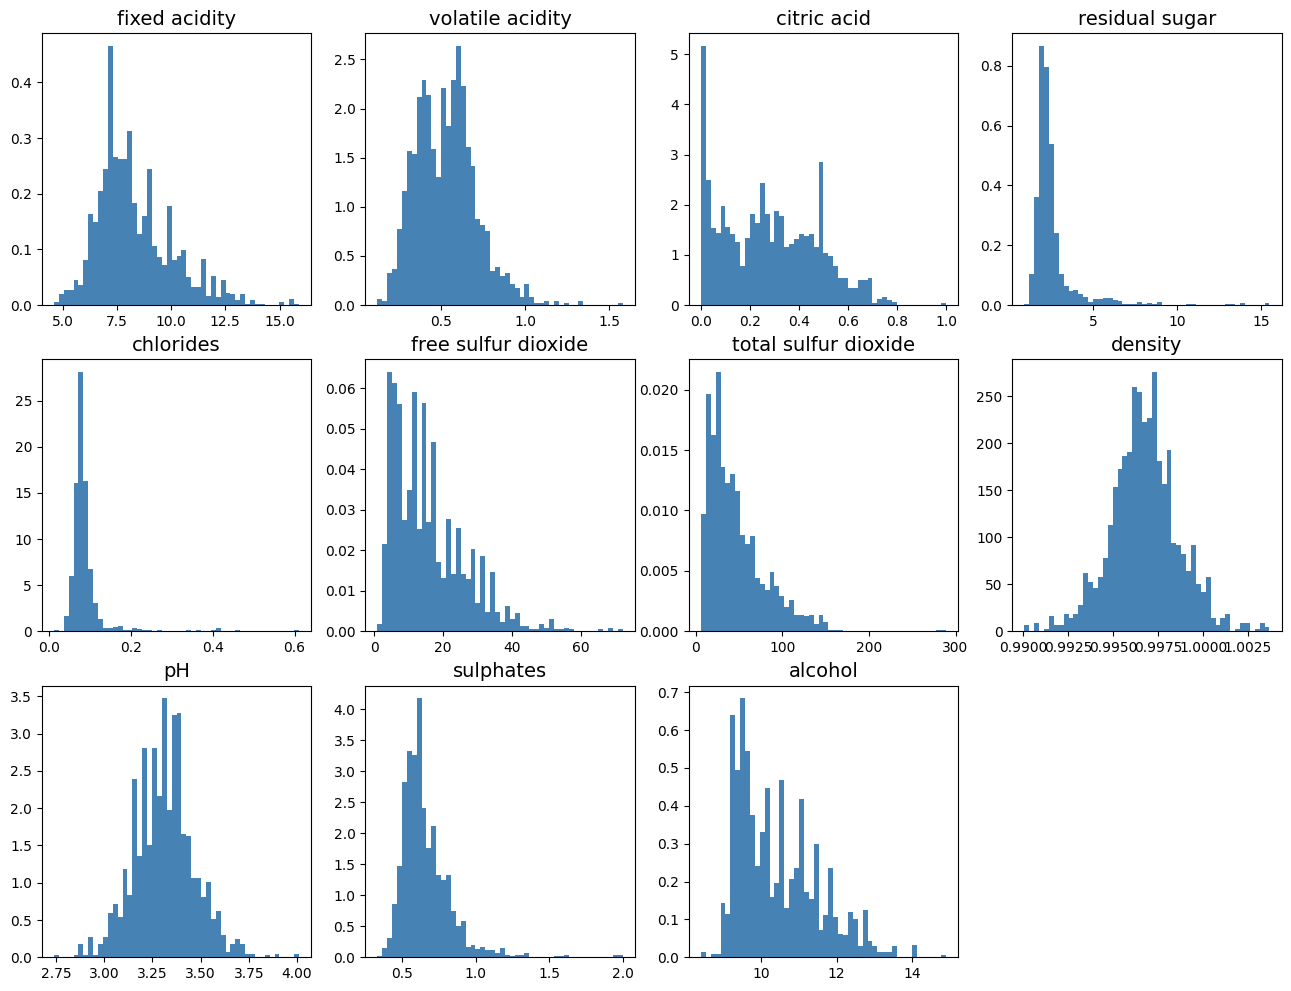

In [6]:
from sklearn import metrics
from matplotlib import pyplot as plt
import numpy as np 
fig = plt.figure(figsize=(16,12))
for feat_idx in range(X.shape[1]):
    ax = fig.add_subplot(3,4, (feat_idx+1))
    h = ax.hist(X[:, feat_idx], bins=50, color='steelblue',density=True, edgecolor='none')
    ax.set_title(data.columns[feat_idx], fontsize=14)

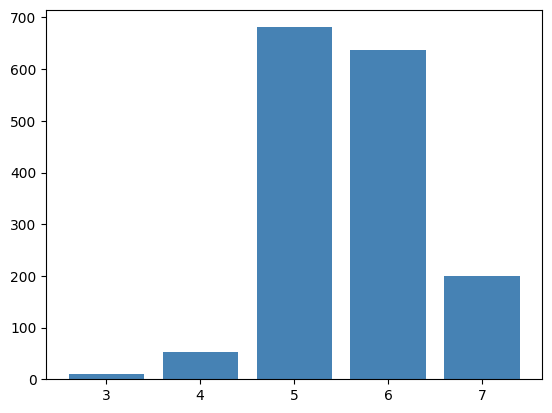

In [7]:
absc = range(np.min(y), np.max(y))
b = plt.bar(absc, [(y == a).sum() for a in absc], color="steelblue")

In [8]:
y_class = np.where(y<6,0,1)
y_class[y_class==1].shape
y_class[y_class==0].shape

(744,)

In [9]:
from sklearn import model_selection
from sklearn import preprocessing

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y_class, test_size=0.3)

std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

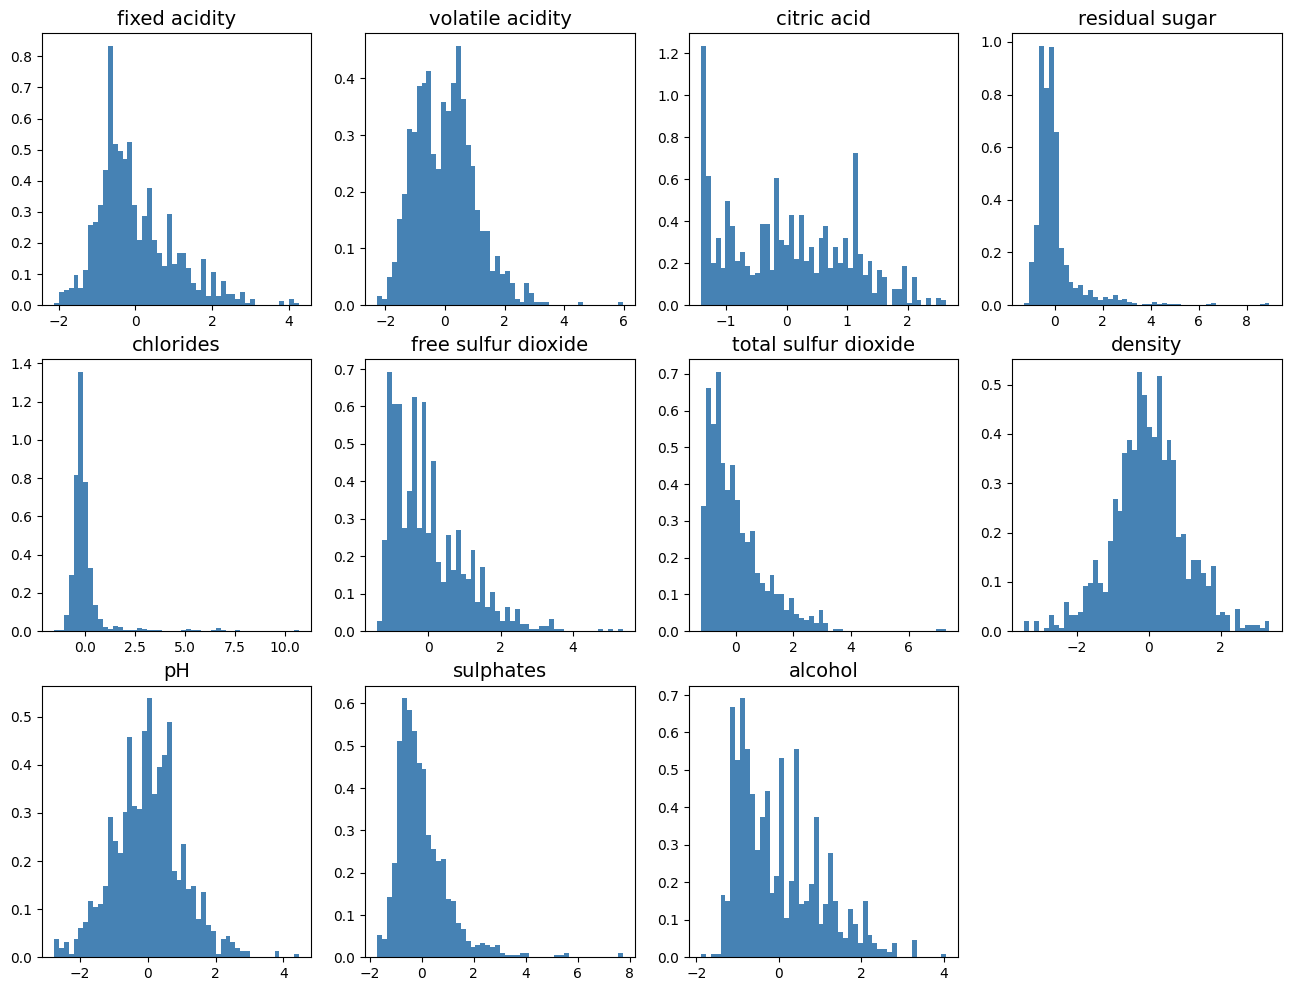

In [10]:
fig = plt.figure(figsize=(16,12))
for feat_idx in range(X_train_std.shape[1]):
    ax = fig.add_subplot(3,4, (feat_idx+1))
    h = ax.hist(X_train_std[:, feat_idx], bins=50, color='steelblue', density=True, edgecolor='none')
    ax.set_title(data.columns[feat_idx], fontsize=14)


In [11]:
from sklearn import neighbors
clf = model_selection.GridSearchCV(neighbors.KNeighborsClassifier(), 
                                   {'n_neighbors':[3,5,7,9,11,13,15]}, 
                                   cv=5, scoring='accuracy')

In [12]:
%%time
clf.fit(X_train_std, y_train)

CPU times: user 230 ms, sys: 4.26 ms, total: 235 ms
Wall time: 233 ms


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15]},
             scoring='accuracy')

In [13]:
clf.best_params_

{'n_neighbors': 11}

In [14]:
for mean, std, params in zip(clf.cv_results_["mean_test_score"], clf.cv_results_["std_test_score"], clf.cv_results_["params"]):
    print("accuracy = %0.3f (+/-%0.3f) for %s)" % (mean,std * 2, params))

accuracy = 0.727 (+/-0.053) for {'n_neighbors': 3})
accuracy = 0.732 (+/-0.038) for {'n_neighbors': 5})
accuracy = 0.732 (+/-0.030) for {'n_neighbors': 7})
accuracy = 0.736 (+/-0.042) for {'n_neighbors': 9})
accuracy = 0.747 (+/-0.056) for {'n_neighbors': 11})
accuracy = 0.738 (+/-0.055) for {'n_neighbors': 13})
accuracy = 0.732 (+/-0.052) for {'n_neighbors': 15})


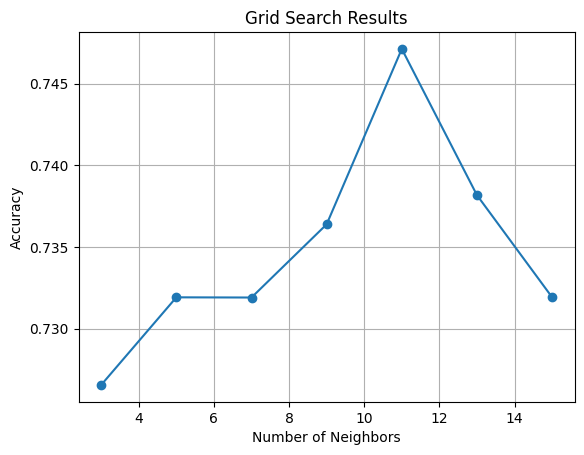

In [15]:
scores = clf.cv_results_['mean_test_score']  
n_neighbors = clf.cv_results_['param_n_neighbors'].data.astype(int)  
  
# Plot the scores as a function of n_neighbors  
plt.plot(n_neighbors, scores, marker='o')  
plt.xlabel('Number of Neighbors')  
plt.ylabel('Accuracy')  
plt.title('Grid Search Results')  
plt.grid(True)  
plt.show()  

In [17]:
from sklearn import metrics
y_pred = clf.predict(X_test_std)
print(metrics.accuracy_score(y_test, y_pred))

0.7083333333333334


In [18]:
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error, r2_score  
  
reg = LinearRegression()  
reg.fit(X_train_std, y_train)  
  
y_pred = reg.predict(X_test_std)  
  
mse = mean_squared_error(y_test, y_pred)  
r2 = r2_score(y_test, y_pred)  
print('Mean Squared Error:', mse)  
print('R-squared:', r2)  

Mean Squared Error: 0.17802867753939425
R-squared: 0.28783583399756174
